# Mini Project on Descriptive Analytics using file handling 

1. **Descriptive Analysis**

`Analyze the distribution of movie ratings. What percentage of movies have high (5), medium (3-4), and low (1-2) ratings?`

`Identify the top 10 most-rated movies`


2. **Genre Insights**

`Which movie genres are the most frequently rated?`

`Compare the average ratings across different genres. Are certain genres consistently rated higher or lower?`

3. **User Engagement Analysis**

`Identify the most active users (profession) based on the number of ratings they’ve given.`

`Analyze the relationship between user demographic attributes (age, gender, occupation) and their movie preferences or rating patterns.`


4. **Rating Distribution by Demographics**

`Investigate how ratings vary by user demographic attributes (age, gender, occupation).`

`Are there specific genres preferred by certain age groups or occupations?`


5. **Top Performers**

`Identify the movies with the highest average ratings (considering a minimum number of ratings for fairness).`

`Analyze the characteristics of top-rated movies (e.g., release year, genres).`


6. **Exploring Long Tail**

`Investigate the "long tail" of the dataset: How many movies receive very few ratings?`

`What are the characteristics of these less-rated movies compared to popular ones?`


7. **Tag Analysis**

`Analyze the tags associated with movies. What are the most frequently used tags?`

`Are tags consistent with movie genres?`

## You can do for self learning

8. **Visualization Projects**

`Create dashboards to visualize:`

`The distribution of ratings by genres and years.`

`Popular genres by user demographics.`

`Heatmaps showing the correlation between genres, user activity, and ratings`

In [2]:
# First Solution - Descriptive Analysys

ratings = open(r"C:\Users\raund\Downloads\ml-1m\ml-1m\ratings.dat")
rating_distribution = dict()
movieId_count = dict()

for line in ratings:
    line = line.strip()
    columns = list(map(int, line.split('::')))
    if columns[2] == 5:
        columns.append('High')
    elif columns[2] == 4 or columns[2] == 3:
        columns.append('Medium')
    else:
        columns.append('Low')

    if columns[1] in movieId_count:
        movieId_count[columns[1]] += 1
    else: 
        movieId_count[columns[1]] = 1

    if columns[4] in rating_distribution:
        rating_distribution[columns[4]] += 1
    else:
        rating_distribution[columns[4]] = 1

for rating_range in rating_distribution:
    print('{0} {1}'.format(rating_range, int(rating_distribution[rating_range] / sum(rating_distribution.values()) * 100)))

movies = open(r"C:\Users\raund\Downloads\ml-1m\ml-1m\movies.dat")
movieId_name = dict()
for line in movies:
    line = line.strip()
    columns = line.split('::')
    movieId_name[int(columns[0])] = columns[1]
    
sorted_counted_data = sorted(movieId_count.items(), key = lambda x:x[1], reverse=True)[:10]
for movieId, count in sorted_counted_data:
    print(movieId_name[movieId], count)

High 22
Medium 61
Low 16
American Beauty (1999) 3428
Star Wars: Episode IV - A New Hope (1977) 2991
Star Wars: Episode V - The Empire Strikes Back (1980) 2990
Star Wars: Episode VI - Return of the Jedi (1983) 2883
Jurassic Park (1993) 2672
Saving Private Ryan (1998) 2653
Terminator 2: Judgment Day (1991) 2649
Matrix, The (1999) 2590
Back to the Future (1985) 2583
Silence of the Lambs, The (1991) 2578


In [11]:
#first soln:descriptivve analysis
import pandas as pd

# Load the ratings.dat file
ratings_path = r"C:\Users\raund\Downloads\ml-1m\ml-1m\ratings.dat"
ratings_columns = ["UserID", "MovieID", "Rating", "Timestamp"]
ratings_df = pd.read_csv(ratings_path, sep="::", names=ratings_columns, engine="python")

# 1. Distribution of movie ratings: High (5), Medium (3-4), Low (1-2)
ratings_df["Rating_Category"] = pd.cut(
    ratings_df["Rating"],
    bins=[0, 2, 4, 5],
    labels=["Low (1-2)", "Medium (3-4)", "High (5)"],
    right=True,
)


rating_distribution = ratings_df["Rating_Category"].value_counts(normalize=True) * 100
print("Rating Distribution (Percentage):")
print(rating_distribution)


top_movies = ratings_df["MovieID"].value_counts().head(10)
print("\nTop 10 Most-Rated Movies (MovieIDs):")
print(top_movies)


movies_path = r"C:\Users\raund\Downloads\ml-1m\ml-1m\movies.dat"
movies_columns = ["MovieID", "Title", "Genres"]
movies_df = pd.read_csv(movies_path, sep="::", names=movies_columns, engine="python", encoding="ISO-8859-1")


top_movies_titles = movies_df[movies_df["MovieID"].isin(top_movies.index)][["MovieID", "Title"]]


top_movies_details = top_movies_titles.merge(
    top_movies.rename("RatingCount"), left_on="MovieID", right_index=True
).sort_values(by="RatingCount", ascending=False)

print("\nTop 10 Most-Rated Movies with Titles:")
print(top_movies_details)



Rating Distribution (Percentage):
Rating_Category
Medium (3-4)    61.004050
High (5)        22.626271
Low (1-2)       16.369679
Name: proportion, dtype: float64

Top 10 Most-Rated Movies (MovieIDs):
MovieID
2858    3428
260     2991
1196    2990
1210    2883
480     2672
2028    2653
589     2649
2571    2590
1270    2583
593     2578
Name: count, dtype: int64

Top 10 Most-Rated Movies with Titles:
      MovieID                                              Title  RatingCount
2789     2858                             American Beauty (1999)         3428
257       260          Star Wars: Episode IV - A New Hope (1977)         2991
1178     1196  Star Wars: Episode V - The Empire Strikes Back...         2990
1192     1210  Star Wars: Episode VI - Return of the Jedi (1983)         2883
476       480                               Jurassic Park (1993)         2672
1959     2028                         Saving Private Ryan (1998)         2653
585       589                  Terminator 2: Judgmen

In [12]:
#second soln: genre insights
import pandas as pd


ratings_path = r"C:\Users\raund\Downloads\ml-1m\ml-1m\ratings.dat"
movies_path = r"C:\Users\raund\Downloads\ml-1m\ml-1m\movies.dat"


ratings_columns = ["UserID", "MovieID", "Rating", "Timestamp"]
ratings_df = pd.read_csv(ratings_path, sep="::", names=ratings_columns, engine="python")


movies_columns = ["MovieID", "Title", "Genres"]
movies_df = pd.read_csv(movies_path, sep="::", names=movies_columns, engine="python", encoding="ISO-8859-1")

merged_df = ratings_df.merge(movies_df, on="MovieID")


genres_split = merged_df["Genres"].str.split('|', expand=True).stack()
genres_split.name = "Genre"


genre_counts = genres_split.value_counts()
print("Most Frequently Rated Genres:")
print(genre_counts)


expanded_genres_df = merged_df.join(genres_split.reset_index(drop=True))

average_ratings_by_genre = expanded_genres_df.groupby("Genre")["Rating"].mean().sort_values(ascending=False)
print("\nAverage Ratings by Genre:")
print(average_ratings_by_genre)


Most Frequently Rated Genres:
Genre
Comedy         356580
Drama          354529
Action         257457
Thriller       189680
Sci-Fi         157294
Romance        147523
Adventure      133953
Crime           79541
Horror          76386
Children's      72186
War             68527
Animation       43293
Musical         41533
Mystery         40178
Fantasy         36301
Western         20683
Film-Noir       18261
Documentary      7910
Name: count, dtype: int64

Average Ratings by Genre:
Genre
Horror         3.590673
Drama          3.587366
Children's     3.585722
Documentary    3.584983
Comedy         3.584408
Adventure      3.584376
War            3.582034
Romance        3.581499
Film-Noir      3.580130
Sci-Fi         3.580026
Thriller       3.579404
Action         3.578859
Musical        3.575747
Animation      3.573551
Fantasy        3.568902
Crime          3.568109
Mystery        3.564602
Western        3.563627
Name: Rating, dtype: float64


In [13]:
# third soln : UEA
import pandas as pd

# Load the necessary files
ratings_path = r"C:\Users\raund\Downloads\ml-1m\ml-1m\ratings.dat" 
users_path = r"C:\Users\raund\Downloads\.ipynb_checkpoints\ml-1m\users.dat"


ratings_columns = ["UserID", "MovieID", "Rating", "Timestamp"]
ratings_df = pd.read_csv(ratings_path, sep="::", names=ratings_columns, engine="python")


users_columns = ["UserID", "Gender", "Age", "Occupation", "Zip-code"]
users_df = pd.read_csv(users_path, sep="::", names=users_columns, engine="python")


merged_users_ratings = ratings_df.merge(users_df, on="UserID")


occupation_activity = merged_users_ratings.groupby("Occupation")["Rating"].count().sort_values(ascending=False)
occupation_map = {
    0: "Other/Not specified", 1: "Academic/Educator", 2: "Artist", 3: "Clerical/Admin",
    4: "College/Grad Student", 5: "Customer Service", 6: "Doctor/Health Care",
    7: "Executive/Managerial", 8: "Farmer", 9: "Homemaker", 10: "K-12 Student",
    11: "Lawyer", 12: "Programmer", 13: "Retired", 14: "Sales/Marketing",
    15: "Scientist", 16: "Self-employed", 17: "Technician/Engineer",
    18: "Tradesman/Craftsman", 19: "Unemployed", 20: "Writer"
}
occupation_activity.index = occupation_activity.index.map(occupation_map)
print("Most Active Users (by Occupation):")
print(occupation_activity)


average_ratings_by_gender = merged_users_ratings.groupby("Gender")["Rating"].mean()
average_ratings_by_age = merged_users_ratings.groupby("Age")["Rating"].mean()
average_ratings_by_occupation = merged_users_ratings.groupby("Occupation")["Rating"].mean()
average_ratings_by_occupation.index = average_ratings_by_occupation.index.map(occupation_map)

print("\nAverage Ratings by Gender:")
print(average_ratings_by_gender)

print("\nAverage Ratings by Age:")
print(average_ratings_by_age)

print("\nAverage Ratings by Occupation:")
print(average_ratings_by_occupation)


Most Active Users (by Occupation):
Occupation
College/Grad Student    131032
Other/Not specified     130499
Executive/Managerial    105425
Academic/Educator        85351
Technician/Engineer      72816
Writer                   60397
Programmer               57214
Artist                   50068
Sales/Marketing          49109
Self-employed            46021
Doctor/Health Care       37205
Clerical/Admin           31623
K-12 Student             23290
Scientist                22951
Customer Service         21850
Lawyer                   20563
Unemployed               14904
Retired                  13754
Tradesman/Craftsman      12086
Homemaker                11345
Farmer                    2706
Name: Rating, dtype: int64

Average Ratings by Gender:
Gender
F    3.620366
M    3.568879
Name: Rating, dtype: float64

Average Ratings by Age:
Age
1     3.549520
18    3.507573
25    3.545235
35    3.618162
45    3.638062
50    3.714512
56    3.766632
Name: Rating, dtype: float64

Average Ratings by O

In [14]:
#fourth soln : RDD
import pandas as pd


ratings_path = r"C:\Users\raund\Downloads\ml-1m\ml-1m\ratings.dat" 
movies_path = r"C:\Users\raund\Downloads\ml-1m\ml-1m\movies.dat"
users_path = r"C:\Users\raund\Downloads\.ipynb_checkpoints\ml-1m\users.dat"


ratings_columns = ["UserID", "MovieID", "Rating", "Timestamp"]
ratings_df = pd.read_csv(ratings_path, sep="::", names=ratings_columns, engine="python")


movies_columns = ["MovieID", "Title", "Genres"]
movies_df = pd.read_csv(movies_path, sep="::", names=movies_columns, engine="python", encoding="ISO-8859-1")


users_columns = ["UserID", "Gender", "Age", "Occupation", "Zip-code"]
users_df = pd.read_csv(users_path, sep="::", names=users_columns, engine="python")


merged_data = ratings_df.merge(users_df, on="UserID").merge(movies_df, on="MovieID")


ratings_by_gender = merged_data.groupby("Gender")["Rating"].mean()
print("Average Ratings by Gender:")
print(ratings_by_gender)


ratings_by_age = merged_data.groupby("Age")["Rating"].mean()
age_map = {
    1: "Under 18", 18: "18-24", 25: "25-34", 35: "35-44",
    45: "45-49", 50: "50-55", 56: "56+"
}
ratings_by_age.index = ratings_by_age.index.map(age_map)
print("\nAverage Ratings by Age:")
print(ratings_by_age)


ratings_by_occupation = merged_data.groupby("Occupation")["Rating"].mean()
occupation_map = {
    0: "Other/Not specified", 1: "Academic/Educator", 2: "Artist", 3: "Clerical/Admin",
    4: "College/Grad Student", 5: "Customer Service", 6: "Doctor/Health Care",
    7: "Executive/Managerial", 8: "Farmer", 9: "Homemaker", 10: "K-12 Student",
    11: "Lawyer", 12: "Programmer", 13: "Retired", 14: "Sales/Marketing",
    15: "Scientist", 16: "Self-employed", 17: "Technician/Engineer",
    18: "Tradesman/Craftsman", 19: "Unemployed", 20: "Writer"
}
ratings_by_occupation.index = ratings_by_occupation.index.map(occupation_map)
print("\nAverage Ratings by Occupation:")
print(ratings_by_occupation)


genres_split = merged_data["Genres"].str.split('|', expand=True).stack()
genres_split.name = "Genre"
expanded_genres_data = merged_data.join(genres_split.reset_index(drop=True))


genre_preferences_by_age = expanded_genres_data.groupby(["Age", "Genre"])["Rating"].mean().unstack()
genre_preferences_by_age.index = genre_preferences_by_age.index.map(age_map)
print("\nGenre Preferences by Age Group (Average Ratings):")
print(genre_preferences_by_age)

genre_preferences_by_occupation = expanded_genres_data.groupby(["Occupation", "Genre"])["Rating"].mean().unstack()
genre_preferences_by_occupation.index = genre_preferences_by_occupation.index.map(occupation_map)
print("\nGenre Preferences by Occupation (Average Ratings):")
print(genre_preferences_by_occupation)


Average Ratings by Gender:
Gender
F    3.620366
M    3.568879
Name: Rating, dtype: float64

Average Ratings by Age:
Age
Under 18    3.549520
18-24       3.507573
25-34       3.545235
35-44       3.618162
45-49       3.638062
50-55       3.714512
56+         3.766632
Name: Rating, dtype: float64

Average Ratings by Occupation:
Occupation
Other/Not specified     3.537544
Academic/Educator       3.576642
Artist                  3.573081
Clerical/Admin          3.656516
College/Grad Student    3.536793
Customer Service        3.537529
Doctor/Health Care      3.661578
Executive/Managerial    3.599772
Farmer                  3.466741
Homemaker               3.656589
K-12 Student            3.532675
Lawyer                  3.617371
Programmer              3.654001
Retired                 3.781736
Sales/Marketing         3.618481
Scientist               3.689774
Self-employed           3.596575
Technician/Engineer     3.613574
Tradesman/Craftsman     3.530117
Unemployed              3.414050
W

In [1]:
#fifth soln: top performers
import pandas as pd


ratings_path = r"C:\Users\raund\Downloads\ml-1m\ml-1m\ratings.dat" 
movies_path = r"C:\Users\raund\Downloads\ml-1m\ml-1m\movies.dat"


ratings_columns = ["UserID", "MovieID", "Rating", "Timestamp"]
ratings_df = pd.read_csv(ratings_path, sep="::", names=ratings_columns, engine="python")

movies_columns = ["MovieID", "Title", "Genres"]
movies_df = pd.read_csv(movies_path, sep="::", names=movies_columns, engine="python", encoding="ISO-8859-1")

merged_data = ratings_df.merge(movies_df, on="MovieID")


min_ratings = 50  
movie_ratings = merged_data.groupby("MovieID").agg(
    avg_rating=("Rating", "mean"),
    rating_count=("Rating", "count"),
    title=("Title", "first"),
    genres=("Genres", "first")
)
top_movies = movie_ratings[movie_ratings["rating_count"] >= min_ratings].sort_values(by="avg_rating", ascending=False)

print("Top-Rated Movies (Minimum 50 Ratings):")
print(top_movies.head(10))


movie_ratings["release_year"] = movie_ratings["title"].str.extract(r"\((\d{4})\)")
top_movies_with_year = top_movies.copy()
top_movies_with_year["release_year"] = movie_ratings["release_year"]


release_year_stats = top_movies_with_year.groupby("release_year").agg(
    count=("avg_rating", "count"),
    avg_rating=("avg_rating", "mean")
).sort_values(by="release_year")

print("\nTop-Rated Movies by Release Year:")
print(release_year_stats)

top_genres = top_movies["genres"].str.split("|", expand=True).stack().value_counts()
print("\nTop Genres Among Top-Rated Movies:")
print(top_genres)



Top-Rated Movies (Minimum 50 Ratings):
         avg_rating  rating_count  \
MovieID                             
2905       4.608696            69   
2019       4.560510           628   
318        4.554558          2227   
858        4.524966          2223   
745        4.520548           657   
50         4.517106          1783   
527        4.510417          2304   
1148       4.507937           882   
922        4.491489           470   
1198       4.477725          2514   

                                                     title  \
MovieID                                                      
2905                                        Sanjuro (1962)   
2019     Seven Samurai (The Magnificent Seven) (Shichin...   
318                       Shawshank Redemption, The (1994)   
858                                  Godfather, The (1972)   
745                                  Close Shave, A (1995)   
50                              Usual Suspects, The (1995)   
527                 

In [2]:
#sixth soln :long tail
import pandas as pd


ratings_path = r"C:\Users\raund\Downloads\ml-1m\ml-1m\ratings.dat"
movies_path = r"C:\Users\raund\Downloads\ml-1m\ml-1m\movies.dat"

ratings_columns = ["UserID", "MovieID", "Rating", "Timestamp"]
ratings_df = pd.read_csv(ratings_path, sep="::", names=ratings_columns, engine="python")

movies_columns = ["MovieID", "Title", "Genres"]
movies_df = pd.read_csv(movies_path, sep="::", names=movies_columns, engine="python", encoding="ISO-8859-1")

merged_data = ratings_df.merge(movies_df, on="MovieID")


movie_ratings_count = merged_data.groupby("MovieID").agg(
    rating_count=("Rating", "count"),
    title=("Title", "first"),
    genres=("Genres", "first")
).sort_values(by="rating_count", ascending=False)

long_tail_movies = movie_ratings_count[movie_ratings_count["rating_count"] < 5]

long_tail_genres = long_tail_movies["genres"].str.split("|", expand=True).stack().value_counts()


popular_movies = movie_ratings_count[movie_ratings_count["rating_count"] >= 50]
popular_genres = popular_movies["genres"].str.split("|", expand=True).stack().value_counts()


print("Long-Tail Movies (Less Than 5 Ratings):")
print(long_tail_movies)

print("\nGenres in Long-Tail Movies:")
print(long_tail_genres)

print("\nGenres in Popular Movies:")
print(popular_genres)


Long-Tail Movies (Less Than 5 Ratings):
         rating_count                                              title  \
MovieID                                                                    
3887                4  Went to Coney Island on a Mission From God... ...   
33                  4                            Wings of Courage (1995)   
985                 4                               Small Wonders (1996)   
3314                4                              Big Trees, The (1952)   
3322                4                                   3 Strikes (2000)   
...               ...                                                ...   
3237                1                 Kestrel's Eye (Falkens öga) (1998)   
763                 1  Last of the High Kings, The (a.k.a. Summer Fli...   
624                 1                               Condition Red (1995)   
2563                1                                      Beauty (1998)   
3290                1                           

In [3]:
#seventh soln : tag analysis
import pandas as pd

movies_path = r"C:\Users\raund\Downloads\ml-1m\ml-1m\movies.dat"


movies_columns = ["MovieID", "Title", "Genres"]
movies_df = pd.read_csv(movies_path, sep="::", names=movies_columns, engine="python", encoding="ISO-8859-1")

genres_split = movies_df["Genres"].str.split('|', expand=True).stack()
genres_split.name = "Tag"
expanded_movies_data = movies_df.join(genres_split.reset_index(drop=True))


tag_frequency = genres_split.value_counts()


tags_consistency = expanded_movies_data.groupby("Genres")["Tag"].apply(lambda x: x.unique())


print("Most Frequently Used Tags:")
print(tag_frequency)

print("\nTags Consistency with Genres:")
print(tags_consistency)


Most Frequently Used Tags:
Tag
Drama          1603
Comedy         1200
Action          503
Thriller        492
Romance         471
Horror          343
Adventure       283
Sci-Fi          276
Children's      251
Crime           211
War             143
Documentary     127
Musical         114
Mystery         106
Animation       105
Fantasy          68
Western          68
Film-Noir        44
Name: count, dtype: int64

Tags Consistency with Genres:
Genres
Action                                           [Comedy, Action, Documentary, Mystery, Drama, ...
Action|Adventure                                 [Crime, Comedy, Drama, Romance, Action, Advent...
Action|Adventure|Animation                                                                 [Crime]
Action|Adventure|Animation|Children's|Fantasy                                             [Sci-Fi]
Action|Adventure|Animation|Horror|Sci-Fi                                                     [War]
                                                  

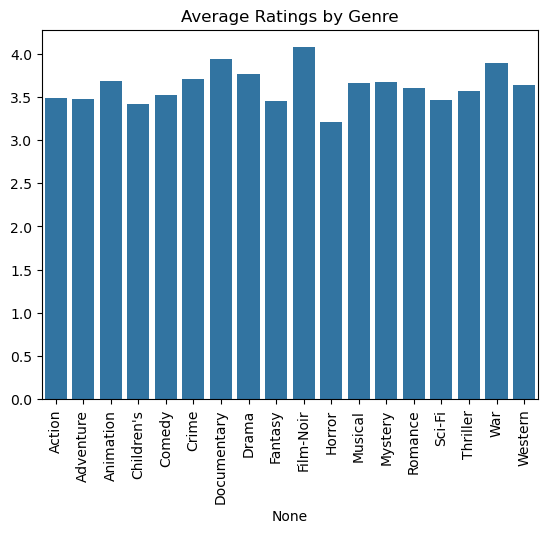

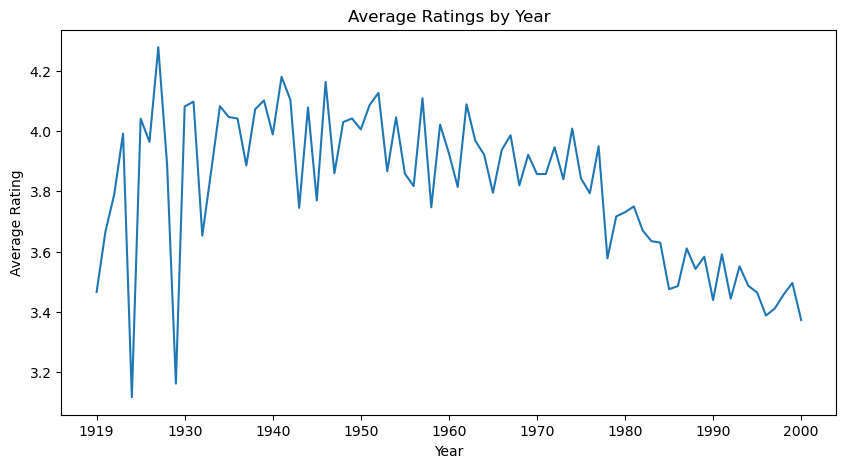

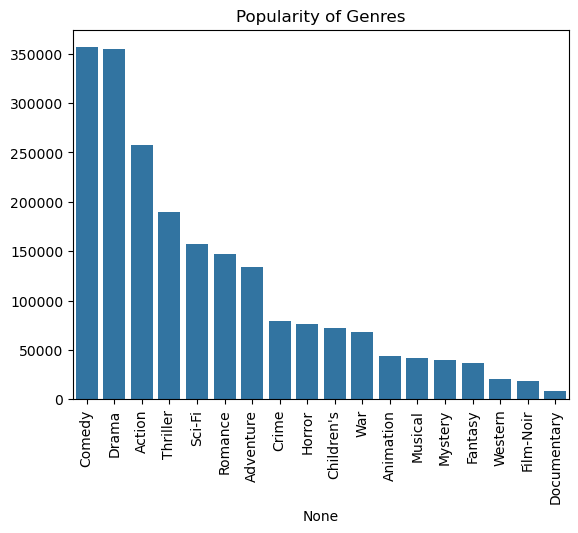

In [5]:
#eigth soln : visualisation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ratings_path = r"C:\Users\raund\Downloads\ml-1m\ml-1m\ratings.dat" 
movies_path = r"C:\Users\raund\Downloads\ml-1m\ml-1m\movies.dat"
ratings_columns = ["UserID", "MovieID", "Rating", "Timestamp"]
movies_columns = ["MovieID", "Title", "Genres"]
ratings_df = pd.read_csv(ratings_path, sep="::", names=ratings_columns, engine="python")
movies_df = pd.read_csv(movies_path, sep="::", names=movies_columns, engine="python", encoding="ISO-8859-1")
merged_data = ratings_df.merge(movies_df, on="MovieID")

merged_data["Year"] = merged_data["Title"].str.extract(r"\((\d{4})\)")
genre_data = merged_data["Genres"].str.get_dummies("|")
ratings_by_genre = genre_data.mul(merged_data["Rating"], axis=0).sum() / genre_data.sum()
ratings_by_year = merged_data.groupby("Year")["Rating"].mean()

sns.barplot(x=ratings_by_genre.index, y=ratings_by_genre.values)
plt.xticks(rotation=90)
plt.title("Average Ratings by Genre")
plt.show()

ratings_by_year.plot(kind="line", figsize=(10, 5))
plt.title("Average Ratings by Year")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.show()

popular_genres = genre_data.sum().sort_values(ascending=False)
sns.barplot(x=popular_genres.index, y=popular_genres.values)
plt.xticks(rotation=90)
plt.title("Popularity of Genres")
plt.show()



In [ ]:
#rat= r"C:\Users\raund\Downloads\ml-1m\ml-1m\ratings.dat" 
#user= r"C:\Users\raund\Downloads\.ipynb_checkpoints\ml-1m\users.dat"
#mov= r"C:\Users\raund\Downloads\ml-1m\ml-1m\movies.dat"